In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


%precision %.4f
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Датасет с винами 3 классов, также даны 13 параметров: содержание спирта, различных веществ и сами отлики - классы вина.

The attributes are:

Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline

About dataset: "These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines."

[Ссылка на датасет на каггл](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

In [2]:
df = pd.read_table("/content/WineDataset.txt", sep=',')
df

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


Датасет сам по себе чистый, почти без выбросов и без пропусков, как мы сейчас увидим:

In [3]:
df.isna().any()

Alcohol                         False
Malic Acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
Wine                            False
dtype: bool

In [4]:
df.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Wine'],
      dtype='object')

In [5]:
df.shape

(178, 14)

In [6]:
df.isnull().any()

Alcohol                         False
Malic Acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
Wine                            False
dtype: bool

На всякий посмотрим типы данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

И посмотрим отклонения, чтобы понять что будем смотреть на выбросы. Но данных мало, так что выбрасывать что-то - не вариант

In [8]:
df.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


По дисперсии сильно выделяется только поле magnesium, поэтому почистим его, в остальных выделений сильных нет. Оставим как есть

<AxesSubplot:>

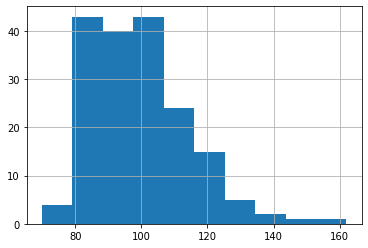

In [9]:
df['Magnesium'].hist()

In [10]:
df.loc[df['Magnesium'] > 140]

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,2
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,2


In [11]:
dM = df.drop(index = [69, 95])

<AxesSubplot:>

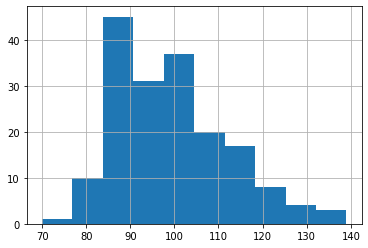

In [12]:
dM['Magnesium'].hist()

Стало получше.

Посмотрим, какая есть корреляция:

<AxesSubplot:>

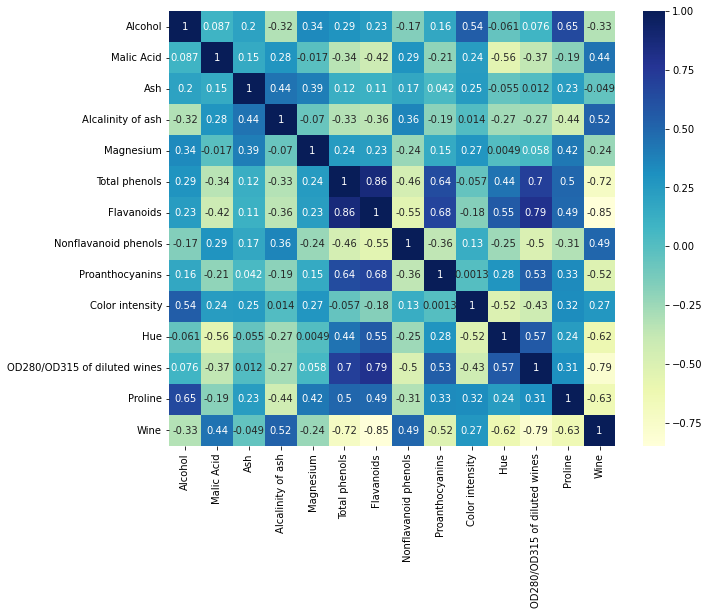

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dM.corr(), annot=True, ax=ax, cmap="YlGnBu" )

In [14]:
dM.shape

(176, 14)

# **Модель**

In [15]:
dM.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Wine'],
      dtype='object')

In [16]:
y = dM[['Wine']]
X = dM[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]

In [17]:
X

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [18]:
y

,Wine
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [19]:
# разделяем выборку на тест и обучающую  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=39)

**Стандартизация**

In [20]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [21]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
      
        n, k = X.shape
        
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self
        
    def predict(self, X):
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    def get_weights(self):
        return self.w

In [22]:
regressor = MyLinearRegression()

regressor.fit(X_train_scaled, y_train['Wine'].values)

predictions = regressor.predict(X_test_scaled)
w = regressor.get_weights()
w

array([-0.07912459,  0.05293506, -0.0771944 ,  0.13212815, -0.02403126,
        0.12822094, -0.39105833, -0.05318911,  0.01813505,  0.20218794,
        0.02167524, -0.19508855, -0.23752304,  1.8974359 ])

In [23]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) 
        self.w = None
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        n, k = X.shape

       
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient_descent(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def _calc_gradient_descent(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

In [24]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) 
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient_descent(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)

        return grad

In [25]:
class MySGDRidge(MySGDLinearRegression):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs) 
        self.w = None
        self.alpha = alpha

    def _calc_gradient_descent(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)

        lambdaI = self.alpha * np.eye(self.w.shape[0])
        if self.fit_intercept:
            lambdaI[-1, -1] = 0

        grad = 2 * (X[inds].T @ X[inds] / self.n_sample + lambdaI) @ self.w
        grad -= 2 * X[inds].T @ y[inds] / self.n_sample

        return grad

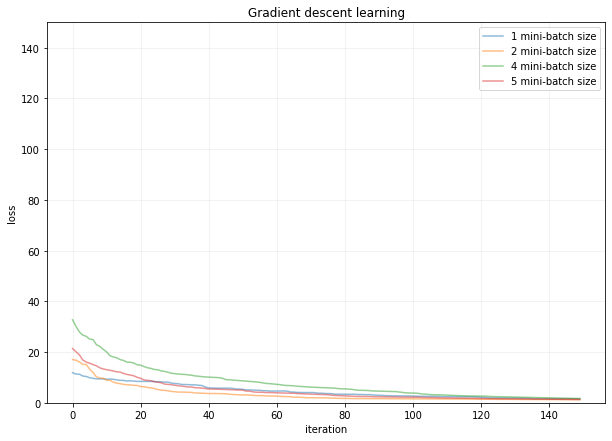

In [26]:
n_samples = [1, 2, 4, 5]

plt.figure(figsize=(10, 7))

for ns in n_samples:
    l = MySGDLinearRegression(fit_intercept=True, n_sample=ns).fit(
        X_train_scaled,
        y_train['Wine'].values,
        lr=5e-3,
        max_iter=150,
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()

Видим небольшое различие, потому что данных самих по себе немного + они чистые и задача стоит определения и предсказания вина 1 из 3 кластеров 

In [27]:
regressor = MySGDRidge(alpha=1, n_sample=20).fit(X_test_scaled, y_test['Wine'].values, max_iter=1000, lr=0.01)
l = regressor.get_losses()
regressor.get_weights()

array([-0.06971973,  0.04301052,  0.00526585,  0.09757368, -0.01140642,
       -0.07156075, -0.1096776 ,  0.03885481, -0.05170803,  0.06416378,
       -0.0851583 , -0.12609879, -0.10810202,  1.90879993])

In [28]:
y_test_pred = regressor.predict(X_test_scaled)

print("RMSE = %.4f" % mean_squared_error(y_test['Wine'].values, y_test_pred, squared=False))
print('MSE = %.4f' % mean_squared_error(y_test['Wine'].values, y_test_pred))
print("R^2 = %.4f" % r2_score(y_test['Wine'].values, y_test_pred))

RMSE = 0.3329
MSE = 0.1108
R^2 = 0.8322


Ridge

In [29]:
model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.3075
Train RMSE = 0.2154


In [30]:
print("Test R^2: %.4f" % r2_score(y_test, y_test_pred))
print("Train R^2: %.4f" % r2_score(y_train, y_train_pred))

Test R^2: 0.8569
Train R^2: 0.9187


Мой R^2 был R^2 = 0.8341

GridSeearch

Text(0, 0.5, 'CV score')

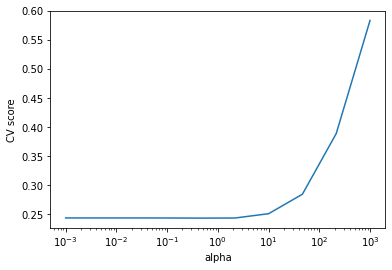

In [31]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5, return_train_score=True)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [32]:
best_alpha = searcher.best_params_["alpha"]
best_alpha

0.46415888336127775

In [33]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
print("MSE = ", round(mean_squared_error(y_test, y_pred),4))

MSE =  0.0958


In [35]:
print("RMSE = ", round(mean_squared_error(y_test, y_pred, squared=False),4))

RMSE =  0.3094


In [36]:
print("R^2 = %.4f" % r2_score(y_test, y_pred))

R^2 = 0.8551


In [37]:
def folds_r2_score(estimator, X_test, y_test):
    predictions = estimator.predict(X_test)
    return r2_score(y_test, predictions)

def folds_mse_score(estimator, X_test, y_test):
    predictions = estimator.predict(X_test)
    return mean_squared_error(y_test, predictions)

def folds_rmse_score(estimator, X_test, y_test):
    predictions = estimator.predict(X_test)
    return mean_squared_error(y_test, predictions, squared=False)

def create_cv_table(k, X_train, y_train,  X_test, y_test):
  folds_list = ['Fold'+str(i) for i in range(k)]

  mse_train = cross_val_score(Ridge(), X_train, y_train, scoring = folds_mse_score, cv=k)
  mse_test = cross_val_score(Ridge(), X_test, y_test, scoring = folds_mse_score, cv=k)

  rmse_train = cross_val_score(Ridge(), X_train, y_train, scoring = folds_rmse_score, cv=k)
  rmse_test = cross_val_score(Ridge(), X_test, y_test, scoring = folds_rmse_score, cv=k)

  r2_train = cross_val_score(Ridge(), X_train, y_train, scoring = folds_r2_score, cv=k)
  r2_test = cross_val_score(Ridge(), X_test, y_test, scoring = folds_r2_score, cv=k) 

  d = np.array([
      mse_train,
      mse_test,
      rmse_train,
      rmse_test,
      r2_train,
      r2_test
  ])

  E = [ i.mean() for i in d]
  STD = [ i.std() for i in d]

  t = pd.DataFrame(data = d, columns=folds_list, index=['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'])

  t['E'] = E
  t['STD'] = STD
  return t

In [38]:
create_cv_table(5, X_train_scaled, y_train, X_test_scaled , y_test)

,Fold0,Fold1,Fold2,Fold3,Fold4,E,STD
mse-train,0.102884,0.034865,0.053322,0.043015,0.074035,0.061624,0.024444
mse-test,0.088324,0.098918,0.099369,0.111195,0.080232,0.095608,0.010560
rmse-train,0.320755,0.186723,0.230915,0.207400,0.272094,0.243577,0.047898
rmse-test,0.297194,0.314512,0.315228,0.333459,0.283252,0.308729,0.017143
r2-train,0.838965,0.942785,0.857539,0.920438,0.872011,0.886348,0.039059
r2-test,0.848587,0.802164,0.876646,0.807084,0.843418,0.835580,0.027733


In [39]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit

model = RFE(estimator=Ridge())

pipe = Pipeline(
    steps = [
        ("scaler", StandardScaler()),
        ("rfe", model)
    ]
)

param = {
    "rfe__step" : np.linspace(0.1, 1, 10),
    "rfe__estimator__alpha" : np.array(np.linspace(1, 15, 15))
}

tscv = TimeSeriesSplit(n_splits=5).split(X_train)

gridsearch = GridSearchCV(estimator=pipe, cv=tscv, param_grid=param, refit=True, return_train_score=True, n_jobs=-1)
fit = gridsearch.fit(X_train, y_train)

y_pred = fit.predict(X_train)

In [40]:
print("Train MSE = ", round(mean_squared_error(y_train, y_pred),4))
print("Train RMSE = ", round(mean_squared_error(y_train, y_pred, squared=False),4))
print("Train R^2 = %.4f" % r2_score(y_train, y_pred))

Train MSE =  0.0552
Train RMSE =  0.235
Train R^2 = 0.9032


In [41]:
y_pred = fit.predict(X_test)

In [42]:
mean_squared_error(y_test, y_pred)

0.09598616706224476

In [43]:
mean_squared_error(y_test, y_pred, squared=False)

0.30981634408508013

In [44]:
r2_score(y_test, y_pred)

0.8547270228070982

In [45]:
selector = RFE(Ridge(), n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
selector.ranking_

array([ 3,  9,  5,  6, 10,  2,  1,  8,  4,  7,  1,  1, 11])